# Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dev = pd.read_csv('development.csv', sep=",", encoding="UTF-8")
eva = pd.read_csv('evaluation.csv', sep=",", encoding="UTF-8")

In [52]:
# print("Information on development set")
# print("Shape: "+str(dev.shape))
# dev.info()
# dev.describe()

Information on development set
Shape: (28754, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28754 entries, 0 to 28753
Data columns (total 2 columns):
text     28754 non-null object
class    28754 non-null object
dtypes: object(2)
memory usage: 449.4+ KB


,text,class
count,28754,28754
unique,28754,2
top,Ho trovato gente cordiale e disponibile a Napo...,pos
freq,1,19532


In [54]:
# print("Information on evaluation set")
# print("Shape: "+str(eva.shape))
# eva.info()
# eva.describe()

Information on evaluation set
Shape: (12323, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12323 entries, 0 to 12322
Data columns (total 1 columns):
text    12323 non-null object
dtypes: object(1)
memory usage: 96.4+ KB


,text
count,12323
unique,12323
top,Mi spiace tanto lasciare una recensione negati...
freq,1


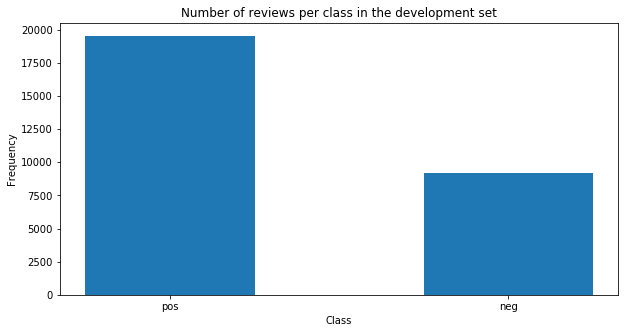

Number of positive reviews: 19532
Number of negative reviews: 9222


In [55]:
# counts = dev["class"].value_counts()
# labels = dev["class"].unique()
# x = [1,2] #position of the bars, x axis
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.bar(x, counts, tick_label=labels, width=0.5)
# plt.title("Number of reviews per class in the development set")
# plt.xlabel('Class')
# plt.ylabel('Frequency')
# plt.show()
# print(f"Number of positive reviews: {counts[0]}")
# print(f"Number of negative reviews: {counts[1]}")

In [56]:
# def count_missing_values(df):
#     for col in df:
#         miss = len(df[df[col].isnull()==True])
#         print(f"{col}: {miss}")

In [58]:
# print("Missing values in the development set:")
# count_missing_values(dev)
# print("Missing values in the evaluation set:")
# count_missing_values(eva)

Missing values in the development set:
text: 0
class: 0
Missing values in the evaluation set:
text: 0


# Preprocessing

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords as sw
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
import re
import string
from sklearn.decomposition import TruncatedSVD

In [5]:
class StemTokenizer(object):
    def __init__(self):
        self.stemmer = SnowballStemmer("italian", ignore_stopwords=True)
        self.tok = TweetTokenizer()
    
    def stemtize(self, document):
        stems = []
        emot = [":)", "!", "...", "....", ":(", ":D", "D:", ":-(", ":-)", ";)", ";-)"]
        re_words = re.compile("^[a-zA-Z]+?")
        for s in document:
            l = ""
            for punct in string.punctuation:
                if punct=="\'":
                    s = s.replace(punct, " ")
            
            for t in self.tok.tokenize(s):
                t = t.strip()

                if t in emot:
                    l = l+" "+t.lower()
                   
                stem = self.stemmer.stem(t)
                
                if stem not in string.punctuation and len(stem) > 2  and re_words.match(stem):
                    l = l+" "+stem.lower()
            
            stems.append(l)
        return stems

In [6]:
tot = dev.append(eva, sort = False)
tokenizer = StemTokenizer()
words = tokenizer.stemtize(tot["text"])
tot["tokens"] = words

In [7]:
stopwords = sw.words('italian')
vectorizer = TfidfVectorizer(input = "content", stop_words=stopwords, min_df=5, token_pattern=r'[^\s]+') #the regular expression r'[^\s]+' allows to include also non alphabetical characters
tfidf_X = vectorizer.fit_transform(tot["tokens"])

In [8]:
tfidf_train = tfidf_X[0:dev.shape[0], :] #training set
tfidf_test = tfidf_X[dev.shape[0]:, :] #test_set

In [16]:
tfidf_train.shape

(28754, 9949)

In [149]:
# svd = TruncatedSVD(n_components=3000, random_state=42)
# svd.fit_transform(tfidf_train)
# print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.89


In [150]:
# cum_variance = np.cumsum(svd.explained_variance_ratio_)
# idx = np.argmax(cum_variance > .8)
# idx

1828

In [9]:
svd = TruncatedSVD(n_components=1828, random_state=42)
X = svd.fit_transform(tfidf_train)
X_test = svd.transform(tfidf_test)

# Classification

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [10]:
# X_train, X_val, y_train, y_val = train_test_split(X, dev["class"], test_size=.2, stratify=dev["class"])

In [154]:
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)
# y_pred_val = clf.predict(X_val)
# print(f1_score(y_val, y_pred_val, average='weighted'))

0.8491128371972119


In [22]:
# clf = SVC()   
# clf.fit(X_train, y_train)
# y_pred_val = clf.predict(X_val)
# print(f1_score(y_val, y_pred_val, average='weighted'))

0.9607703162292075


In [155]:
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# y_pred_val = clf.predict(X_val)
# print(f1_score(y_val, y_pred_val, average='weighted'))

0.8513091237267244


In [156]:
# clf = KNeighborsClassifier()
# clf.fit(X_train, y_train)
# y_pred_val = clf.predict(X_val)
# print(f1_score(y_val, y_pred_val, average='weighted'))

0.7665430952474347


In [35]:
# clf = GaussianNB()
# clf.fit(X_train, y_train)
# y_pred_val = clf.predict(X_val)
# print(f1_score(y_val, y_pred_val, average='weighted'))

0.6807803517168544


In [11]:
def build_classifier(X_train, y_train, X_test, y_test, clf_to_evaluate, scores, param_grid, n_folds=3):
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(clf_to_evaluate, param_grid, cv=n_folds,
    scoring=score, verbose=True, n_jobs=4, iid=False)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    return clf

In [13]:
# params_grid = {
# 'kernel': ["linear", "rbf"],
# 'C':[1,50,100],
# 'gamma':["scale", 1.0, 10.0]
# }
# score = "f1_weighted"
# clf_to_evaluate = SVC()
# best_clf = build_classifier(X_train, y_train, X_val, y_val, clf_to_evaluate, score, params_grid)

# Tuning hyper-parameters for f1_weighted

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 123.4min
[Parallel(n_jobs=4)]: Done  54 out of  54 | elapsed: 193.6min finished
c:\users\missb\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best parameters set found on development set:

{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

Grid scores on development set:

0.958 (+/-0.001) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.958 (+/-0.001) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.958 (+/-0.001) for {'C': 1, 'gamma': 1.0, 'kernel': 'linear'}
0.958 (+/-0.002) for {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
0.958 (+/-0.001) for {'C': 1, 'gamma': 10.0, 'kernel': 'linear'}
0.550 (+/-0.000) for {'C': 1, 'gamma': 10.0, 'kernel': 'rbf'}
0.937 (+/-0.003) for {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.959 (+/-0.002) for {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.937 (+/-0.003) for {'C': 50, 'gamma': 1.0, 'kernel': 'linear'}
0.958 (+/-0.001) for {'C': 50, 'gamma': 1.0, 'kernel': 'rbf'}
0.937 (+/-0.003) for {'C': 50, 'gamma': 10.0, 'kernel': 'linear'}
0.550 (+/-0.000) for {'C': 50, 'gamma': 10.0, 'kernel': 'rbf'}
0.933 (+/-0.004) for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.959 (+/-0.002) for {'C': 1

In [12]:
clf = SVC(C = 1, gamma = 'scale', kernel = 'rbf') #submission 22
clf.fit(X, dev["class"])
y_pred = clf.predict(X_test)

In [13]:
def write_to_file(y_pred):
    col_names = ["Id", "Predicted"]
    with open("resultProject.csv", 'w', encoding="UTF-8") as fp:
        header = ','.join(col_names)
        fp.write(f'{header}\n')
        conta = 0
        for i in range(len(y_pred)):
            cols = []
            cols.append(str(conta))
            cols.append(str(y_pred[i]))
            conta=conta+1
            cols = ','.join(cols)
            fp.write(f'{cols}\n')

In [14]:
write_to_file(y_pred)